------
------


# **데이터 분석 및 시각화 프로젝트**

------
------
<br>

## **1.유튜브 랭킹 크롤링 & 국내 상위 1000명의 유튜브 채널 비교 분석 프로젝트**

### **1-1. 시각화를 위한 한글폰트 설치**

#### 1. 나눔바른고딕 폰트를 설치
#### 2. 설치한 폰트의 경로와 이름을 설정하여 Matplotlib에 추가
#### 3. Matplotlib의 기폰 폰트 설정을 나눔바른고딕으로 업데이트

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

#### 4. 나눔바른고딕의 폰트를 Matplotlib에 추가하고 설정한 후, 적용하기 위해 런타임을 재시작

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

#### 5. 마이너스 기호가 정확히 표시되도록 마이너스 기호를 설정
#### 6. 나눔바른고딕 한글 폰트를 Matplotlib에 추가하여 한글이 제대로 표시되도록 설정

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

### **1-2. 데이터 크롤링 및 시각화 준비를 위한 기본 준비**

#### 1. 레티나 디스플레이를 지원하는 환경에서 더 높은 그래프를 표시하기 위한 설정

#### 2. 선명한 그래프를 위한 설정 추가

In [2]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

#### 3. 웹 브라우저 제어 및 크롤링을 위한 selenium 패키지 설치
#### 4. 리눅스 패키지 관리자를 통해 시스템 패키지 목록 업데이트
#### 5. BeautifulSoup을 사용해 HTML 페이지를 파싱하기위해 사용
#### 6. 시간 지연 및 대기를 관리하기 위한 내장 모듈 time을 사용
#### 7. 데이터프레임 및 데이터 조작을 위한 Pandas 라이브러리 사용
#### 8. 데이터 시각화를 위한 Matplotlib을 사용
#### 9. x축의 눈금을 조절하기 위해 ticker 사용

In [70]:
!pip install selenium
!apt install chromium-chromedriver
!apt-get update
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ub

### **1-3. 데이터 크롤링을 위한 준비**

#### 1. Chrome 브라우저의 옵션을 설정하기 위해 ChromeOptions 개체를 생성
#### 2. Chrome을 헤드리스 모드로 실행하도록 옵션을 추가 (GUI를 띄우지 않고 백그라운드에서 실행을 위한 설정)
#### 3. 보안 기능 중 하나인 sandbox 모드를 비활성화
#### 4. 메모리 문제를 해결하기 위한 /dev/shm (공유 메모리 파일 시스템)을 비활성화
#### 5. 설정한 Chrome 옵션을 사용하여 Chrome 웹 드라이버 초기화
#### 6. 브라우저를 유튜브 랭킹 페이지로 이동
#### 7. 유튜브 랭킹 페이지의 소스 코드를 가져옴
#### 8. BeautifulSoup을 사용하여 HTML을 파싱한 후 웹 페이지의 요소에 접근

<img src = "https://drive.google.com/uc?id=1IqPqdWX2j038A8wBUPhKfABbdZuoY6_b" height = 500 width = 700>


In [4]:
# Chrome 옵션 설정 (headless 모드로 실행)
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Chrome 드라이버 실행
browser = webdriver.Chrome(options=chrome_options)
# 유튜브 랭킹 페이지 주소
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
browser.get(url)

html = browser.page_source   # 접속한 웹 페이지의 HTML 다운로드
soup = BeautifulSoup(html, 'html.parser')   # BeautifulSoup으로 읽음

### 1-4. 유튜브 채널 데이터 크롤링

#### 1. HTML에서 채널 목록을 나타내는 행을 선택
#### 2. 크롤링한 데이터를 저장할 리스트를 선언
#### 3. 채널을 선택하여 제목, 카테고리 정보, 구독자 수, 채널의 총 조회수, 채널의 총 동영상 수를 선택

In [5]:
# YouTube 랭킹 페이지에서 각 채널의 정보를 크롤링
channel_list = soup.select('form > table > tbody > tr')

# 결과를 저장할 리스트 선언 및 초기화
results = []

for channel in channel_list:
    # 각 채널별 필요한 정보를 선택
    title = channel.select_one('h1 > a') # 채널 제목
    category = channel.select_one('p.category') # 채널 카테고리
    subscriber = channel.select_one('.subscriber_cnt') # 채널의 구독자 수
    view = channel.select_one('.view_cnt') # 채널의 총 조회수
    video = channel.select_one('.video_cnt') # 채널의 총 동영상 수

    # 선택한 정보가 모두 존재하는 경우에만 데이터를 저장
    if title and category and subscriber and view and video:
        title_text = title.get_text(strip=True)
        category_text = category.get_text(strip=True)
        subscriber_text = subscriber.get_text(strip=True)
        view_text = view.get_text(strip=True)
        video_text = video.get_text(strip=True)

#### 4. 크롤링한 데이터를 저장한 리스트를 초기화
#### 5. 1 ~ 10 페이지를 반복수행
#### 6. 선택한 페이지 번호를 이용하여 웹 페이지 URL 생성
#### 7. Selenium을 사용하여 생성한 URL로 브라우저를 이동
#### 8. 이동한 페이지의 HTML 소스코드를 가져옴
#### 9. BeautifulSoup을 사용하여 웹 페이지의 HTML을 파싱
#### 10. 채널의 제목, 카테고리, 구독자 수, 채널의 총 조회수, 채널의 총 동영상 수를 선택
#### 11. 각 채널의 정보를 list 형태로 생성
#### 12. 생성한 list를 결과 리스트에 추가

In [6]:
# 1부터 10까지의 페이지를 반복 수행
for page in range(1, 11):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 각 페이지의 채널 목록에서 정보를 추출하여 리스트에 저장
    for channel in soup.select('form table tbody tr'):
        title = channel.select_one('h1 a').text.strip() # 채널 제목
        category = channel.select_one('p.category').text.strip() # 채널 카테고리
        subscriber = channel.select_one('.subscriber_cnt').text # 채널의 구독자 수
        view = channel.select_one('.view_cnt').text # 채널의 총 조회수
        video = channel.select_one('.video_cnt').text # 채널의 총 동영상 수

        # 채널 정보를 리스트로 만들어 결과 리스트에 추가
        data = [title, category, subscriber, view, video]
        results.append(data)

### **1-5. 데이터 프레임 생성 & CSV 파일 저장**

#### 1. 크롤링한 데이터(result)를 DataFrame으로 변환
#### 2. title, category, subscriber, view, video -> DataFrame의 열 이름 설정
#### 3. DataFrame을 CSV 파일로 저장

In [7]:
df = pd.DataFrame(results)

# 크롤링한 데이터를 DataFrame으로 변환
df.columns = ['title', 'category', 'subscriber', 'view', 'video']

# CSV 파일로 저장
df.to_csv('./youtube_rank.csv', index = True)

#### 4. CSV 파일을 불러와서 DataFrame으로 저장
#### 5. 저장한 DataFrame의 상위 10개의 행을 출력

In [8]:
import pandas as pd
# 데이터(CSV 파일) 로드
df = pd.read_csv('./youtube_rank.csv')

# 상위 10개의 행 출력
df.head(10)

,Unnamed: 0,title,category,subscriber,view,video
0,0,BLACKPINK,[음악/댄스/가수],9220만,339억0466만,587개
1,1,BANGTANTV,[음악/댄스/가수],7690만,217억9572만,"2,401개"
2,2,HYBE LABELS,[음악/댄스/가수],7350만,313억0867만,"1,560개"
3,3,DaFuq!?Boom!,[미분류],3590만,138억4425만,264개
4,4,SMTOWN,[음악/댄스/가수],3220만,283억7353만,"4,269개"
5,5,김프로KIMPRO,[BJ/인물/연예인],2840만,293억1777만,"2,238개"
6,6,Mark Rober,[미분류],2830만,44억2420만,130개
7,7,JYP Entertainment,[음악/댄스/가수],2830만,211억4379만,"1,942개"
8,8,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
9,9,1MILLION Dance Studio,[음악/댄스/가수],2620만,80억5246만,"6,444개"


### **1-6. 데이터 전처리 및 카테고리별 구독자 비율 시각화**
#### 1. subscriber 열에서 '만'을 제거 -> 0000을 붙여 숫자로 변환한 replaced_subscriber 열을 생성
#### 2. 'category' 기준으로 그룹화하여 각 카테고리의 구독자 수 합과 채널 수를 계산 -> 결과를 pivot_df DataFrame에 저장
#### 3. 구독자 수를 카테고리별로 파이 차트로 시각화

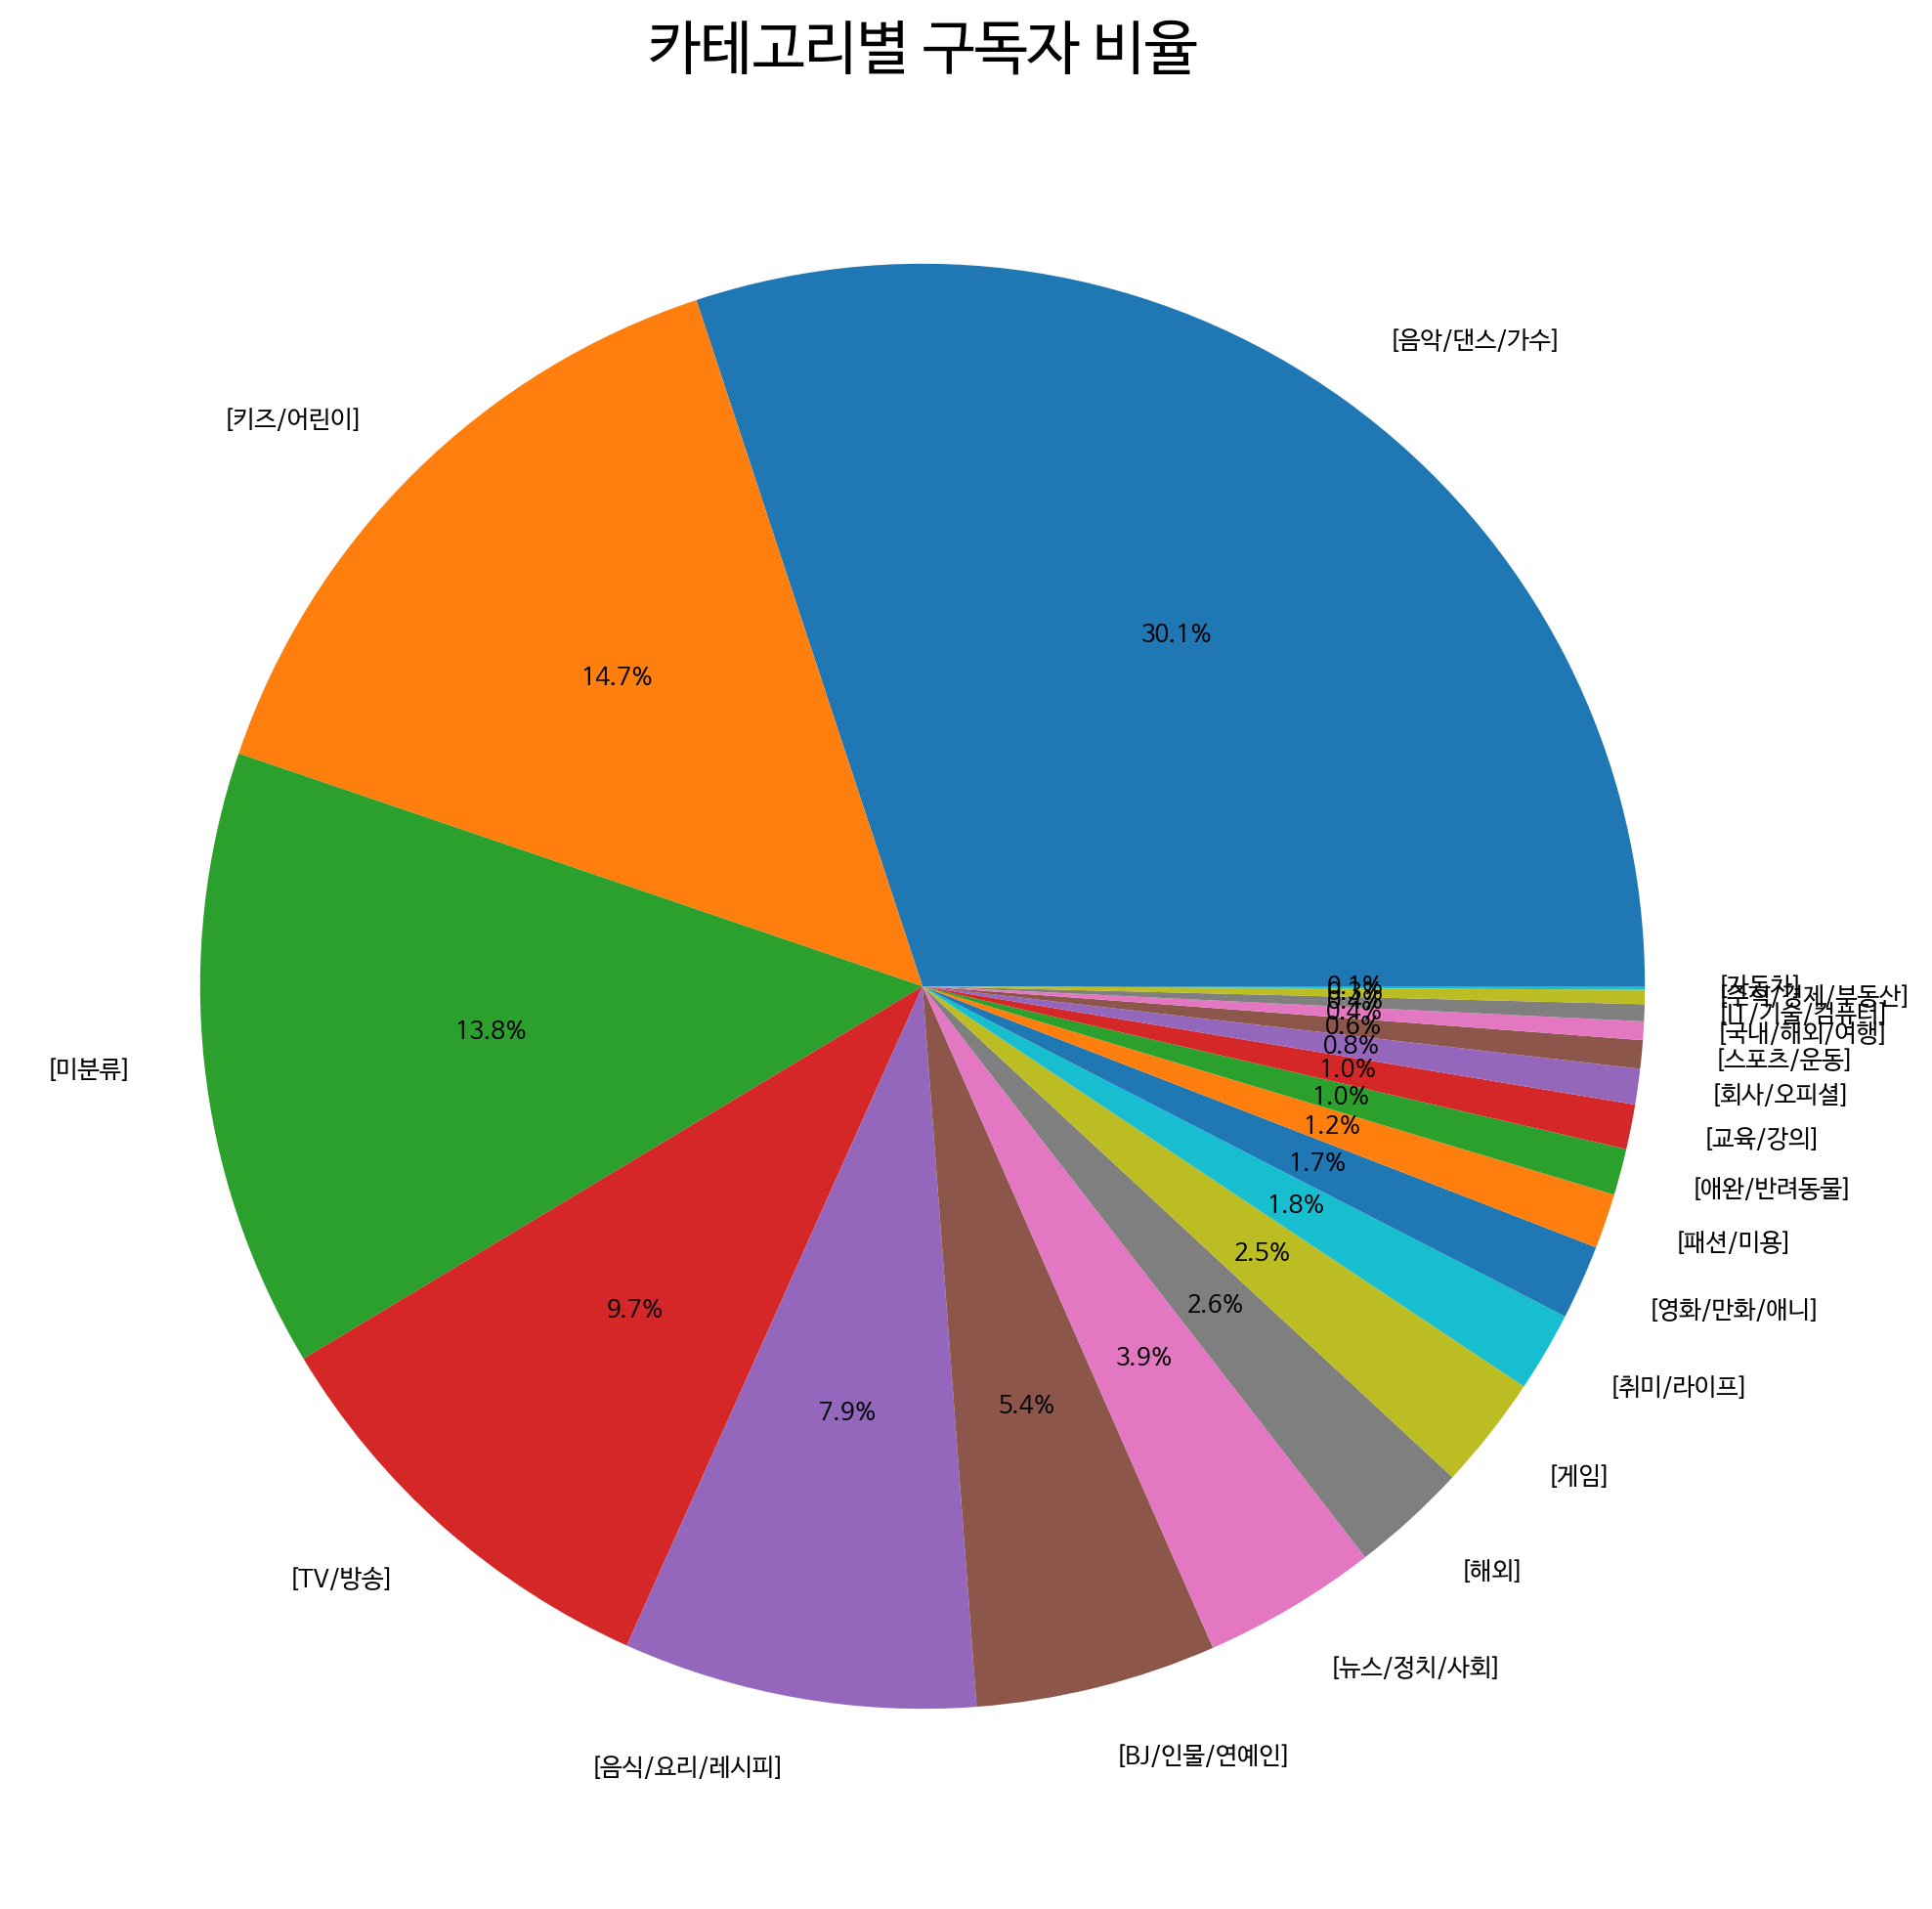

In [9]:
# 구독자 수 데이터 전처리
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000').astype('int')

# 카테고리별 구독자 합과 카운트 계산
pivot_df = df.groupby('category')['replaced_subscriber'].agg(['sum', 'count']).reset_index()
pivot_df.columns = ['category', 'subscriber_sum', 'category_count']
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)

# 시각화
plt.figure(figsize=(15, 12))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%', textprops={'fontsize': 9})
plt.title('카테고리별 구독자 비율')
plt.show()


### **1-7. 각 카테고리의 비율 시각화**
#### 1. DataFrame에서 각 카테고리의 채널 수를 가져옴
#### 2. 각 카테고리별 비율을 파이 차트로 시각화

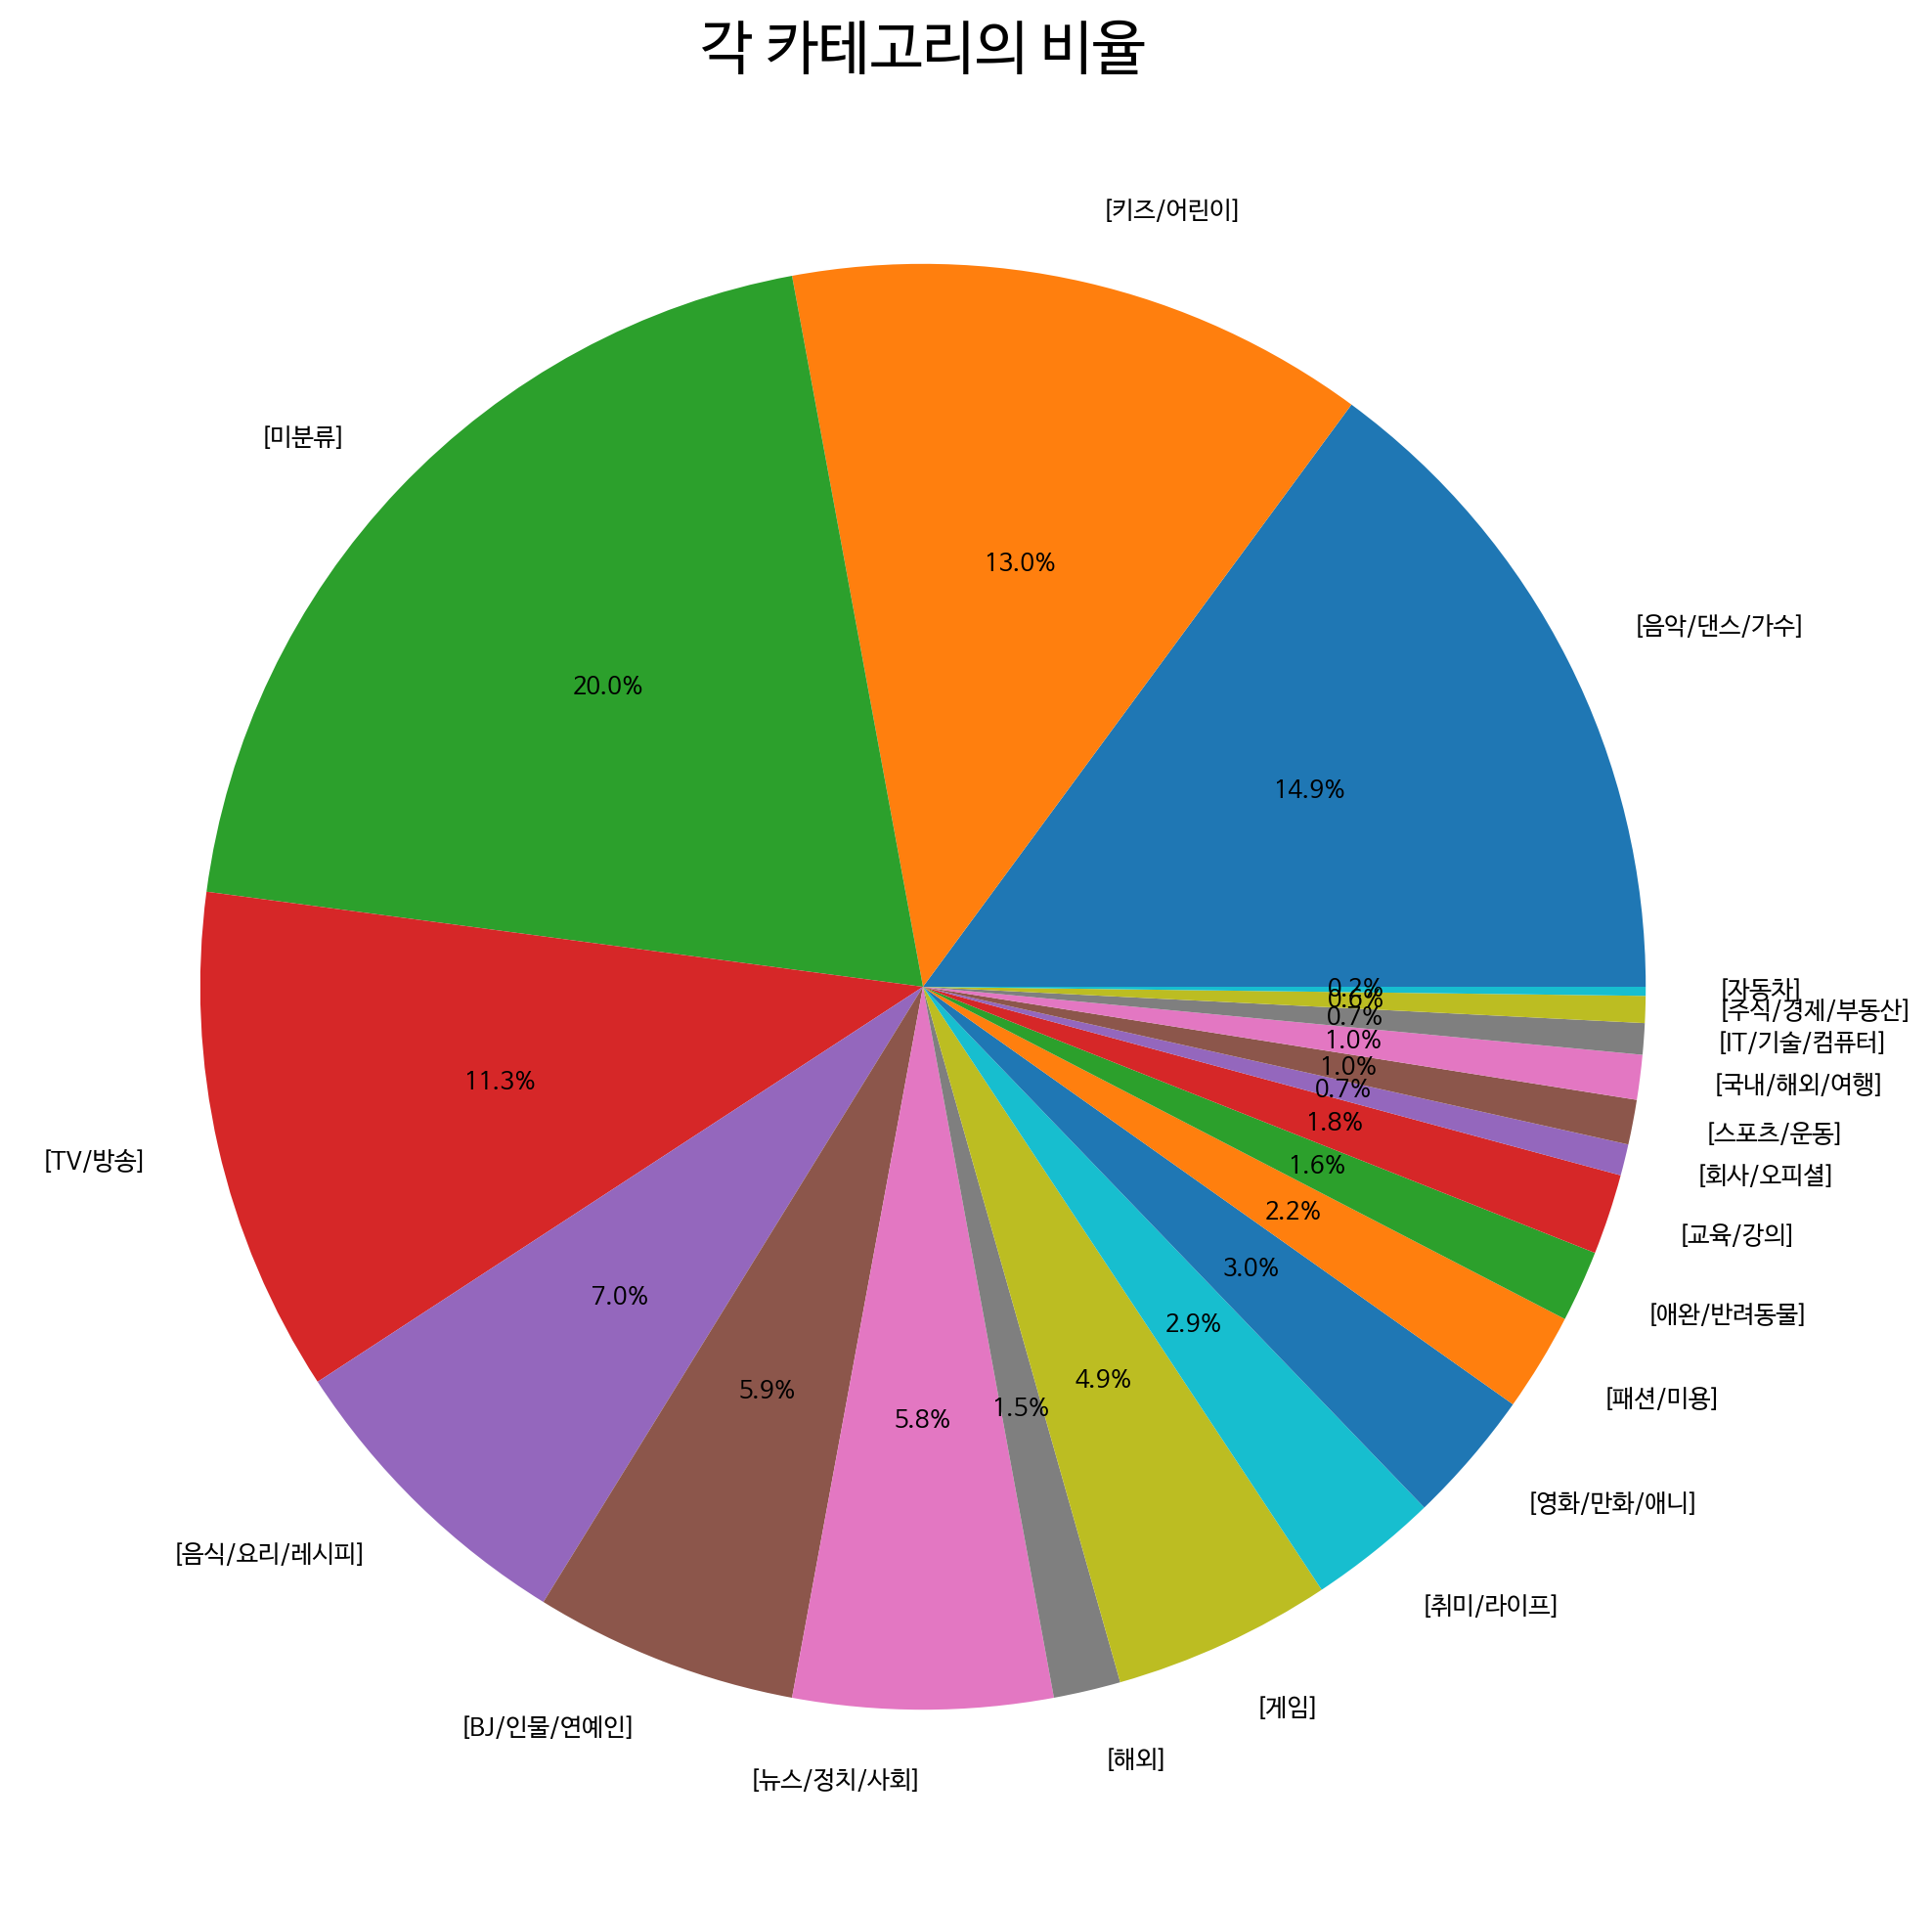

In [10]:
plt.figure(figsize = (15, 12))

# 각 카테고리의 채널 수
plt.pie(pivot_df['category_count'], labels = pivot_df['category'], autopct='%1.1f%%', textprops={'fontsize': 9})
plt.title('각 카테고리의 비율')
plt.show()

### **1-8. 각 카테고리별 영상 수 비율**
#### 1. DataFrame에서 category 열의 값들을 기준으로 각 카테고리별 채널 수를 계산
#### 2. 데이터 전처리하기

In [40]:
# 각 카테고리별 영상 수 계산
video_count_per_category = df['category'].value_counts()
print(video_count_per_category)

[미분류]          200
[음악/댄스/가수]     149
[키즈/어린이]       130
[TV/방송]        113
[음식/요리/레시피]     70
[BJ/인물/연예인]     59
[뉴스/정치/사회]      58
[게임]            49
[영화/만화/애니]      30
[취미/라이프]        29
[패션/미용]         22
[교육/강의]         18
[애완/반려동물]       16
[해외]            15
[스포츠/운동]        10
[국내/해외/여행]      10
[회사/오피셜]         7
[IT/기술/컴퓨터]      7
[주식/경제/부동산]      6
[자동차]            2
Name: category, dtype: int64


#### 3. 각 카테고리의 비디오 수를 전체 비디오 수로 나누어 비율을 계산
#### 4. 각 카테고리의 비디오 수 비율을 파이 차트로 시각화

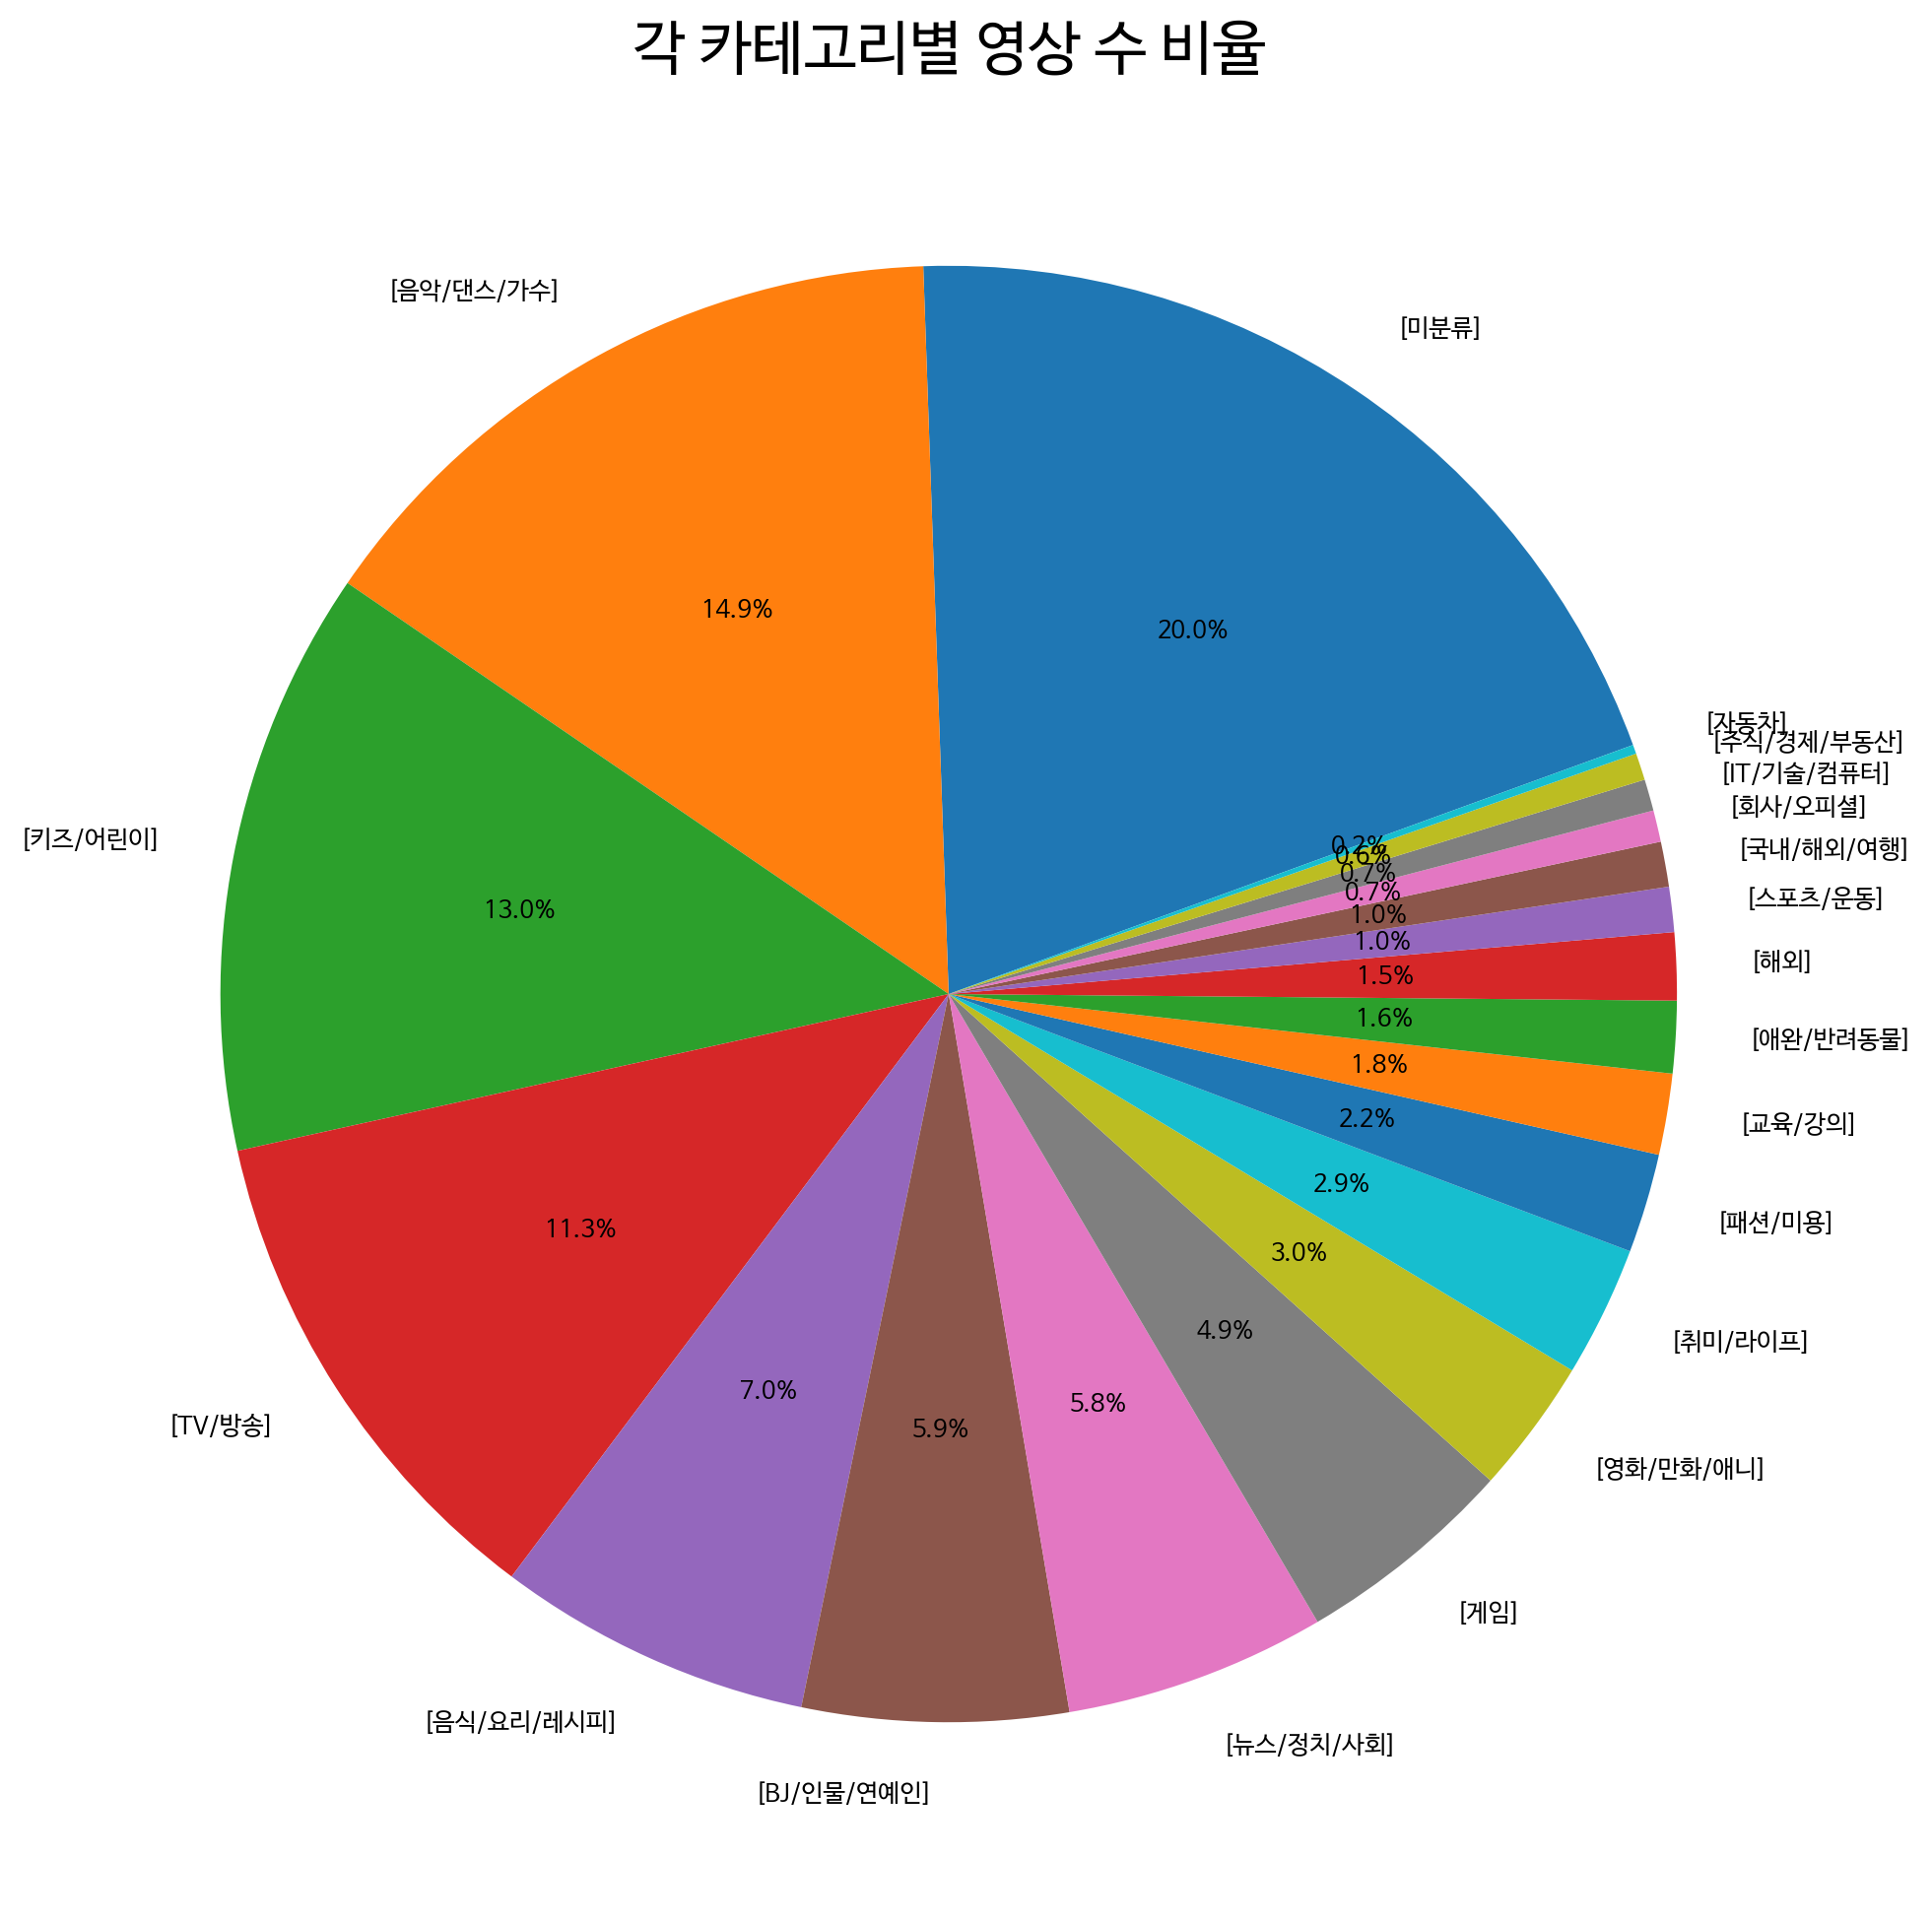

In [123]:
# 각 카테고리별 영상 수 비율 계산
percentage_per_category = (video_count_per_category / video_count_per_category.sum()) * 100

# 파이 차트 그리기
plt.figure(figsize=(15, 12))
plt.pie(percentage_per_category, labels=percentage_per_category.index, autopct='%1.1f%%', startangle=20, textprops={'fontsize': 9})
plt.title('각 카테고리별 영상 수 비율')
plt.show()

#### 5. DataFrame의 view 열의 조회수 데이터를 숫자로 변환하는 작업
#### 6. str.replace를 사용하여 '억'은 빈 문자열, '만'은 '0000'으로 대체
#### 7. pd.to_numeric 함수를 이용하여 문자열 -> 숫자로 변환 (errors='coerce'를 이용하여 오류는 NaN 처리)
#### 8. 반환된 replaced_view 열의 상위 20개 값 출력

In [130]:
# view 열의 문자열 형식을 숫자 값으로 변환
df['replaced_view'] = df['view'].str.replace('억', '', regex=True).str.replace('만', '0000', regex=True)
# view 열의 데이터를 숫자로 변환, 오류는 NaN으로 처리
df['replaced_view'] = pd.to_numeric(df['replaced_view'], errors='coerce')

print(df['replaced_view'].head(20))

0     33904660000
1     21795720000
2     31308670000
3     13844250000
4     28373530000
5     29317770000
6      4424200000
7     21143790000
8     11052880000
9      8052460000
10     6157880000
11    24496590000
12    15560460000
13    15660160000
14    10864730000
15     7417380000
16     3824160000
17    12437920000
18     5483300000
19    11944350000
Name: replaced_view, dtype: int64


#### 9. category 열로 그룹화하여 각 카테고리의 조회수 합을 계산
#### 10. 조회수가 0인 카테고리를 제외하고, 남은 데이터를 내림차순으로 정렬
#### 11. 파이 차트를 생성하며, 각 카테고리의 조회수 비율을 표현

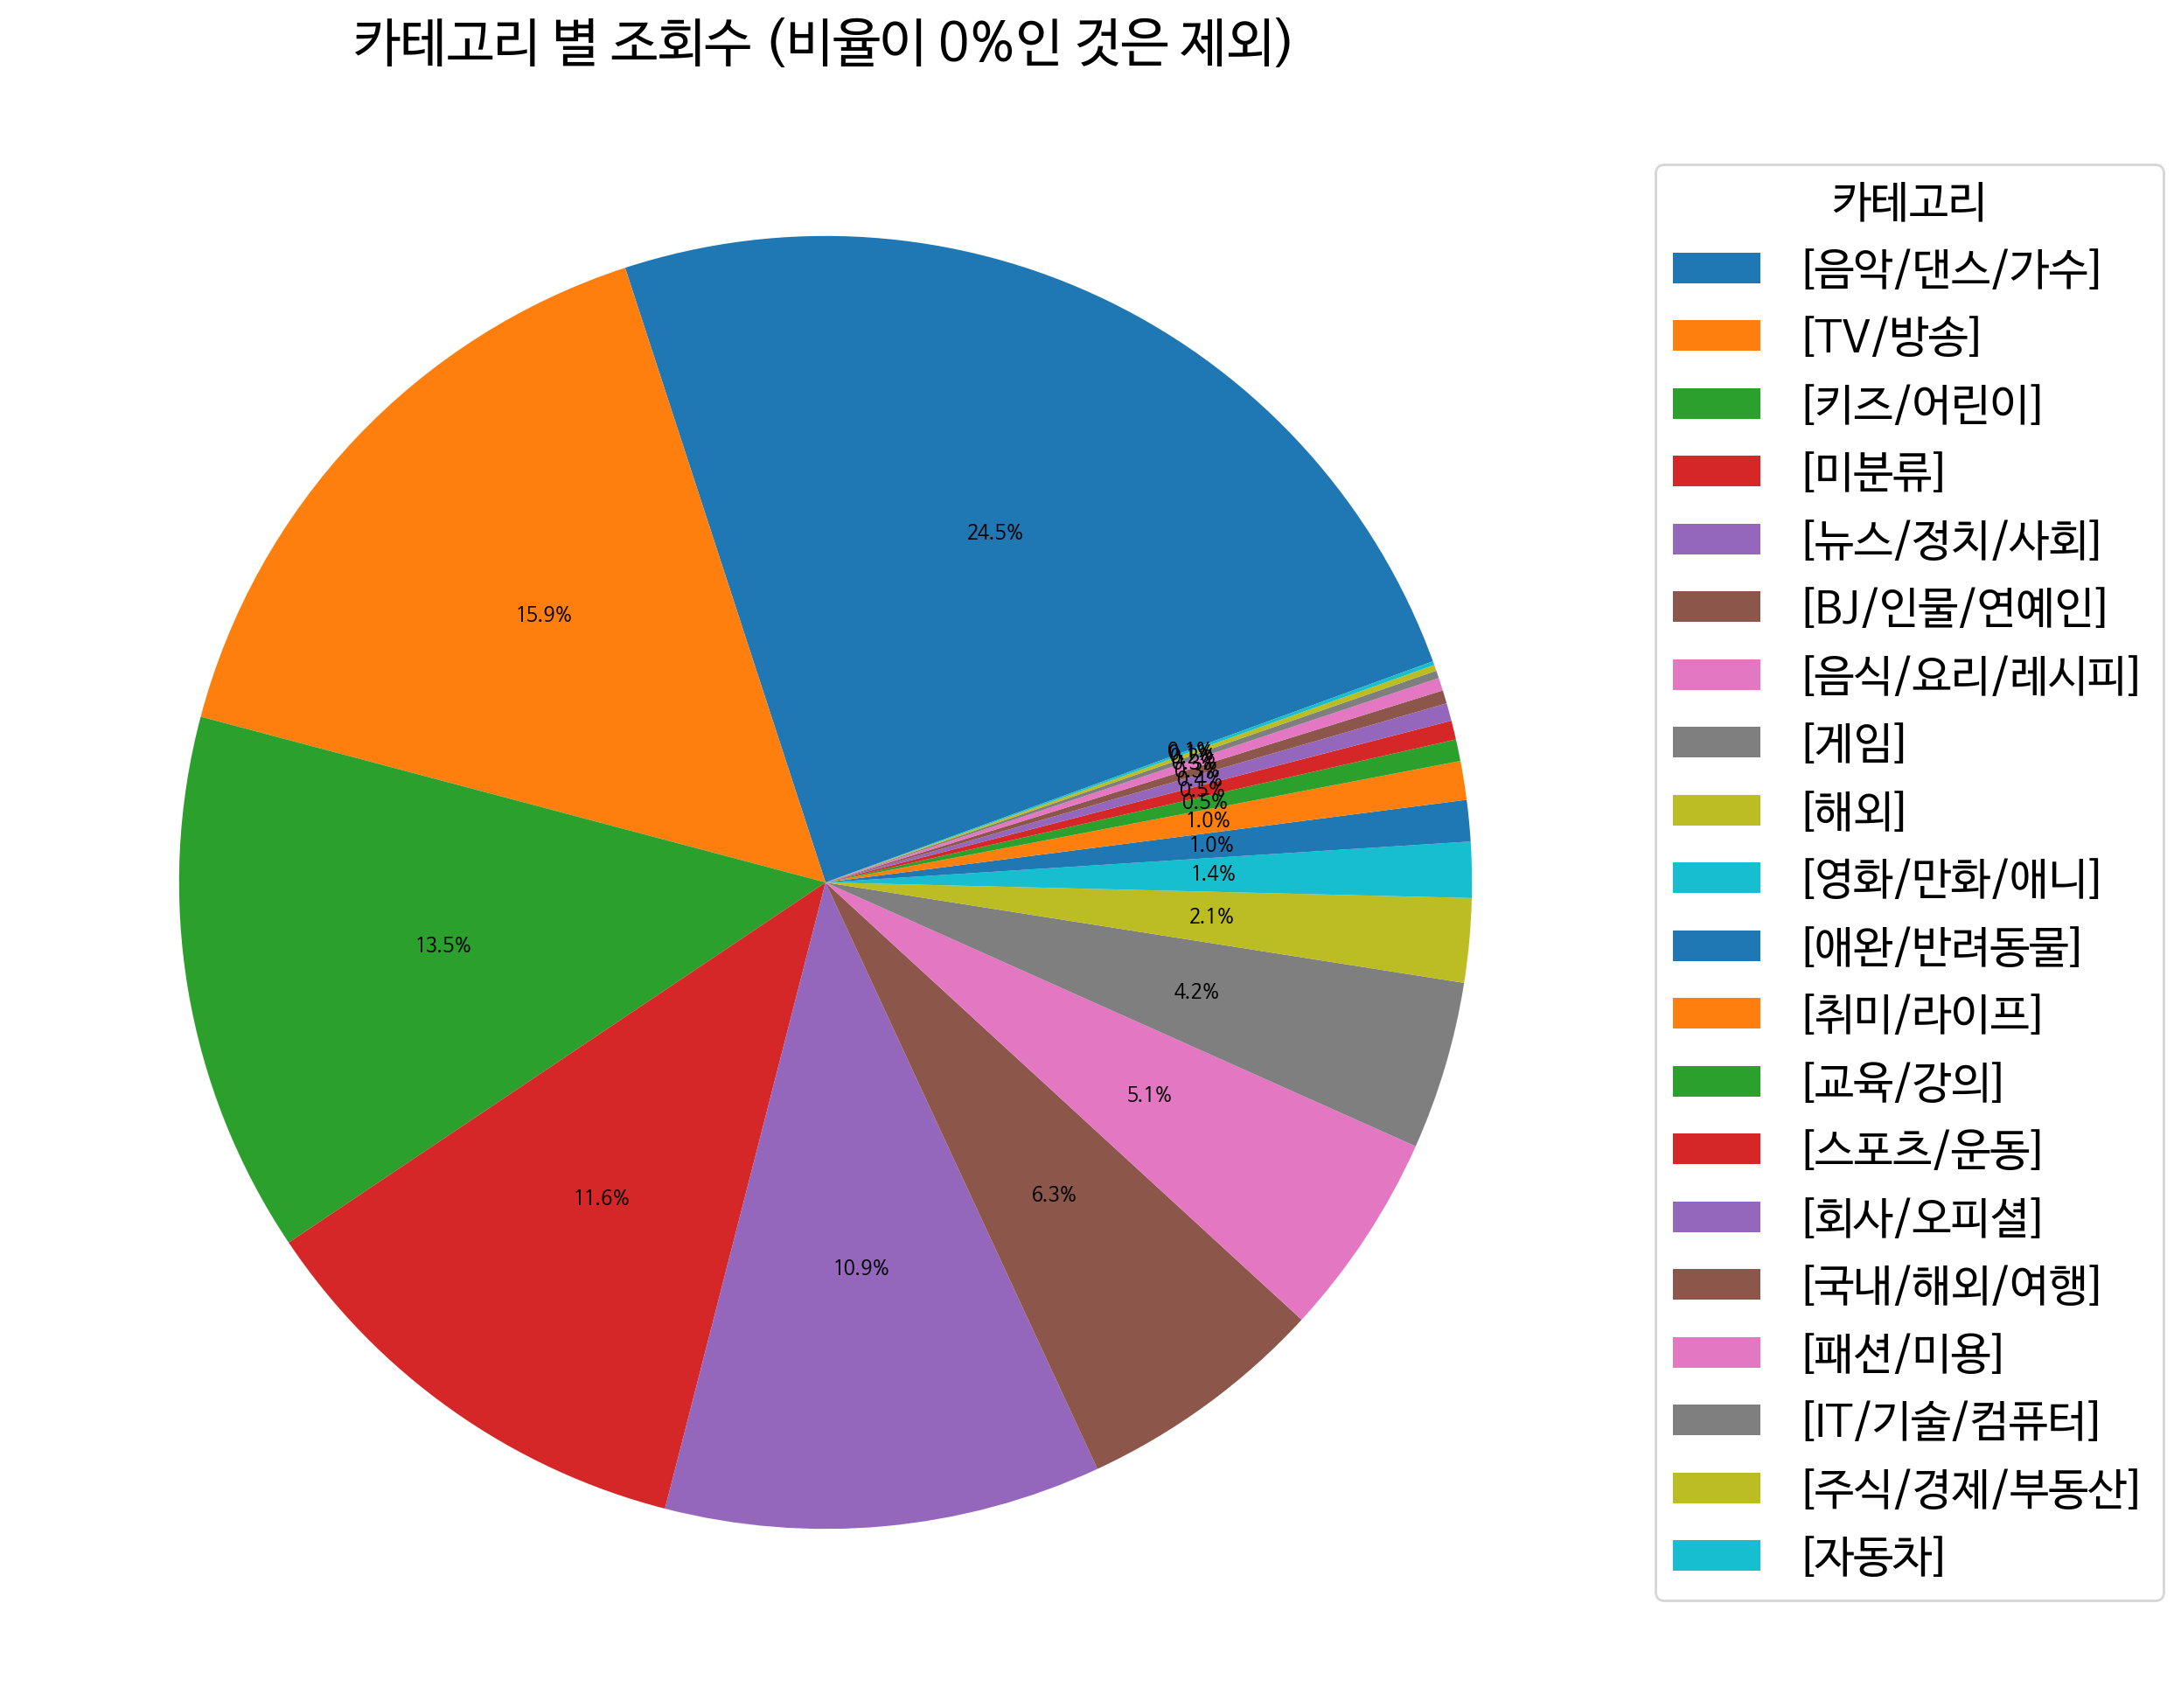

In [128]:
# 카테고리별로 그룹화하고 조회수의 합을 계산
views_by_category = df.groupby('category')['replaced_view'].agg('sum').reset_index()

# 조회수 비율이 0%인 카테고리 제외
views_by_category = views_by_category[views_by_category['replaced_view'] > 0]

# 조회수를 기준으로 내림차순으로 정렬
views_by_category = views_by_category.sort_values(by='replaced_view', ascending=False)


# 파이 차트 그리기
plt.figure(figsize=(15, 12))
plt.pie(views_by_category['replaced_view'], autopct='%1.1f%%', startangle=20, textprops={'fontsize': 8})
plt.legend(views_by_category['category'], title='카테고리', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('카테고리 별 조회수 (비율이 0%인 것은 제외)')
plt.show()


### **1-9. 상위 10개 채널의 구독자 수 파악**
#### 1. DataFrame을 replaced_subscriber 열을 기준으로 내림차순 정렬하여 상위 10개 채널을 선택
#### 2. 데이터 전처리 및 각 채널의 제목과 구독자 수를 출력

In [153]:
# 'replaced_subscriber' 기준으로 DataFrame을 내림차순으로 정렬
top_10_channels = df.sort_values(by='replaced_subscriber', ascending=False).head(10)

# 각 채널의 제목과 구독자 수를 출력
for index, row in top_10_channels.iterrows():
    print(f"{row['title']}: {row['replaced_subscriber']}")

BLACKPINK: 92200000
BANGTANTV: 76900000
HYBE LABELS: 73500000
DaFuq!?Boom!: 35900000
SMTOWN: 32200000
김프로KIMPRO: 28400000
Mark Rober: 28300000
JYP Entertainment: 28300000
Boram Tube Vlog [보람튜브 브이로그]: 26500000
1MILLION Dance Studio: 26200000


#### 3. 수평 막대 그래프를 통해 x축 눈금 레이블에 구독자 수, y축에 채널명이 표시됨
#### 4. 지수 표기법을 일반 표기법으로 전환하여 구독자 수 표시
#### 5. x축 눈금 레이블에 대한 formatter를 위에서 생성한 formatter로 설정
#### 6. 각 막대 위에 구독자 수를 표시하는 텍스트를 추가
#### 7. 막대의 길이(구독자 수)를 가져오고, bar.get_y()+bar.get_height()/2로 막대 중앙의 위치를 계산하여 막대 위에 구독자 수를 표시하는 텍스트 추가


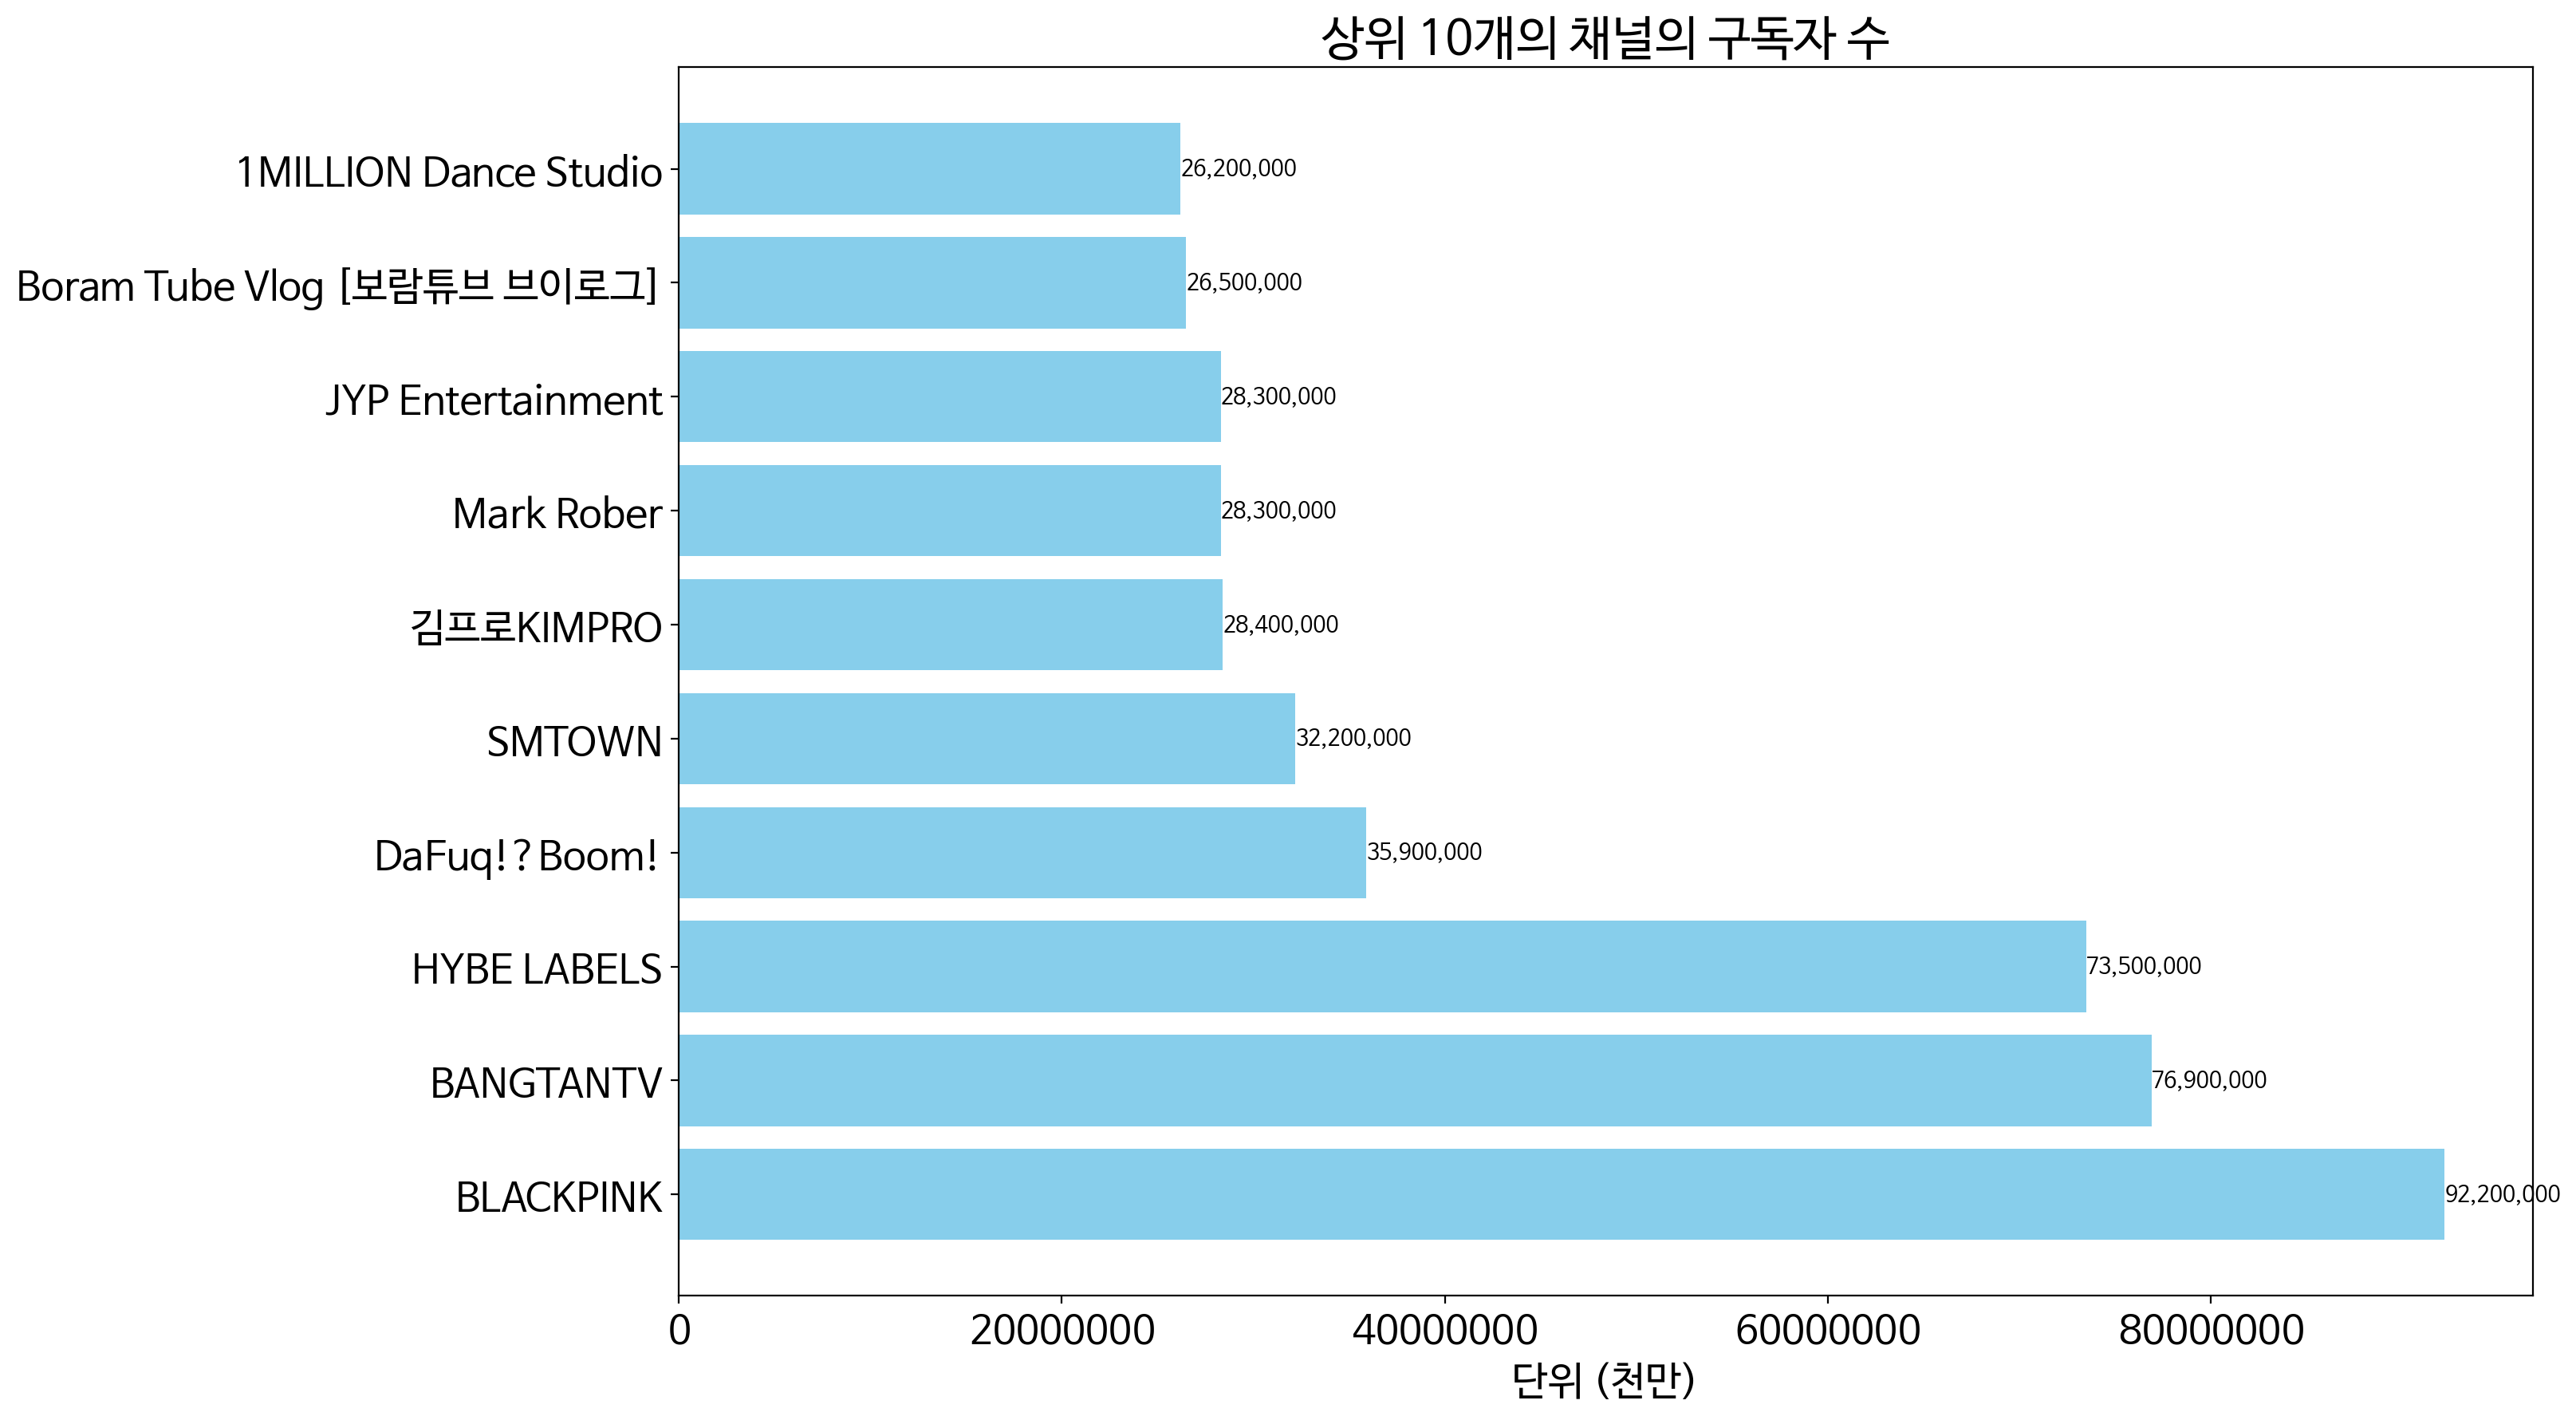

In [142]:
# bar graph로 그리기
plt.figure(figsize=(15, 10))
bars = plt.barh(top_10_channels['title'], top_10_channels['replaced_subscriber'], color='skyblue')
plt.xlabel('단위 (천만)')
plt.title('상위 10개의 채널의 구독자 수')

# 마지막 x축 눈금 레이블을 사용자 정의
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)  # 지수표기법을 일반표기법으로 변환
plt.gca().xaxis.set_major_formatter(formatter)

# 막대 위에 값 표시
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10)

plt.show()

### **1-10. 100만 구독자 이상과 미만의 채널 수와 비율**

#### 1. DataFrame에 있는 전체 채널의 수를 계산하고, 이를 total_channels 변수에 저장
#### 2. subscriber 열의 데이터를 전처리하여 '만'을 '0000'으로 변경
#### 3. 변경한 데이터를 정수형으로 변환하여 replaced_subscriber 열에 저장

In [154]:
total_channels = len(df)
# 데이터 프레임에서 replaced_subscriber 열의 데이터 전처리
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000').astype('int')

#### 4. 100만 구독자 이상과 미만의 채널을 나누어 각각의 DataFrame을 생성
#### 5. 100만 구독자 이상과 미만의 채널명과 구독자 수를 각각 출력

In [176]:
# 100만 구독자 이상과 100만 구독자 미만을 나누어 데이터프레임 생성 (상워 1000명의 유튜브 채널 한정)
more_than_1m_subscribers = df[df['replaced_subscriber'] >= 1000000]
less_than_1m_subscribers = df[df['replaced_subscriber'] < 1000000]

# 각 채널의 제목과 구독자 수를 출력
print("100만 구독자 이상 채널: \n")
print("---------------------------------------------")
for index, row in more_than_1m_subscribers.iterrows():
    print(f"{row['title']}: {row['replaced_subscriber']}")

print("---------------------------------------------")
print("\n100만 구독자 미만 채널: \n")
for index, row in less_than_1m_subscribers.iterrows():
    print(f"{row['title']}: {row['replaced_subscriber']}")

100만 구독자 이상 채널: 

---------------------------------------------
BLACKPINK: 92200000
BANGTANTV: 76900000
HYBE LABELS: 73500000
DaFuq!?Boom!: 35900000
SMTOWN: 32200000
김프로KIMPRO: 28400000
Mark Rober: 28300000
JYP Entertainment: 28300000
Boram Tube Vlog [보람튜브 브이로그]: 26500000
1MILLION Dance Studio: 26200000
Alan Becker: 25300000
1theK (원더케이): 24700000
Mnet K-POP: 20800000
KBS WORLD TV: 19400000
officialpsy: 18400000
Jane ASMR 제인: 17800000
JFlaMusic: 17500000
승비니 Seungbini: 16700000
TWICE: 16500000
GH'S: 16100000
Hongyu ASMR 홍유: 15500000
BIGBANG: 15100000
Stray Kids: 14800000
서은일상이야기: 14500000
Boram Tube ToysReview [보람튜브 토이리뷰]: 14500000
BIBO와 장난감: 13000000
CRAZY GREAPA: 12600000
[햄지]Hamzy: 12000000
TOMORROW X TOGETHER OFFICIAL: 11300000
핑크퐁 (인기 동요・동화): 11300000
토이몽 TV - ToyMong Tv: 11000000
DuDuPopTOY: 11000000
Stone Music Entertainment: 10800000
MBCkpop: 10600000
쏘영 Ssoyoung: 10400000
SEVENTEEN: 10400000
Larva TUBA: 10000000
EXO: 9560000
M2: 9560000
문복희 Eat with Boki: 9420000
Boram Tube [宝

#### 6. 100만 구독자 이상과 미만 각각의 비율을 계산
#### 7. 전체 채널 대비 100만 구독자 이상 및 미만 채널의 비율을 나타냄

In [ ]:
# 100만 구독자 이상과 100만 구독자 미만의 비율 계산
percentage_more_than_1m = (len(more_than_1m_subscribers) / len(df)) * 100
percentage_less_than_1m = (len(less_than_1m_subscribers) / len(df)) * 100

#### 8. 100만 구독자 이상 및 미만 각각에 속하는 채널의 실제 수를 계산

In [ ]:
# 100만 구독자 이상 채널의 실제 수 계산
count_more_than_1m = int(percentage_more_than_1m * total_channels / 100)

# 100만 구독자 미만 채널의 실제 수 계산
count_less_than_1m = int(percentage_less_than_1m * total_channels / 100)

#### 9. 100만 구독자 이상과 미만의 채널을 나타내는 두 막대 그래프를 시각화
#### 10. 각 막대에 비율을 나타내는 텍스트를 추가 (이때, 텍스트는 비율과 해당 범주의 채널 수를 표시)

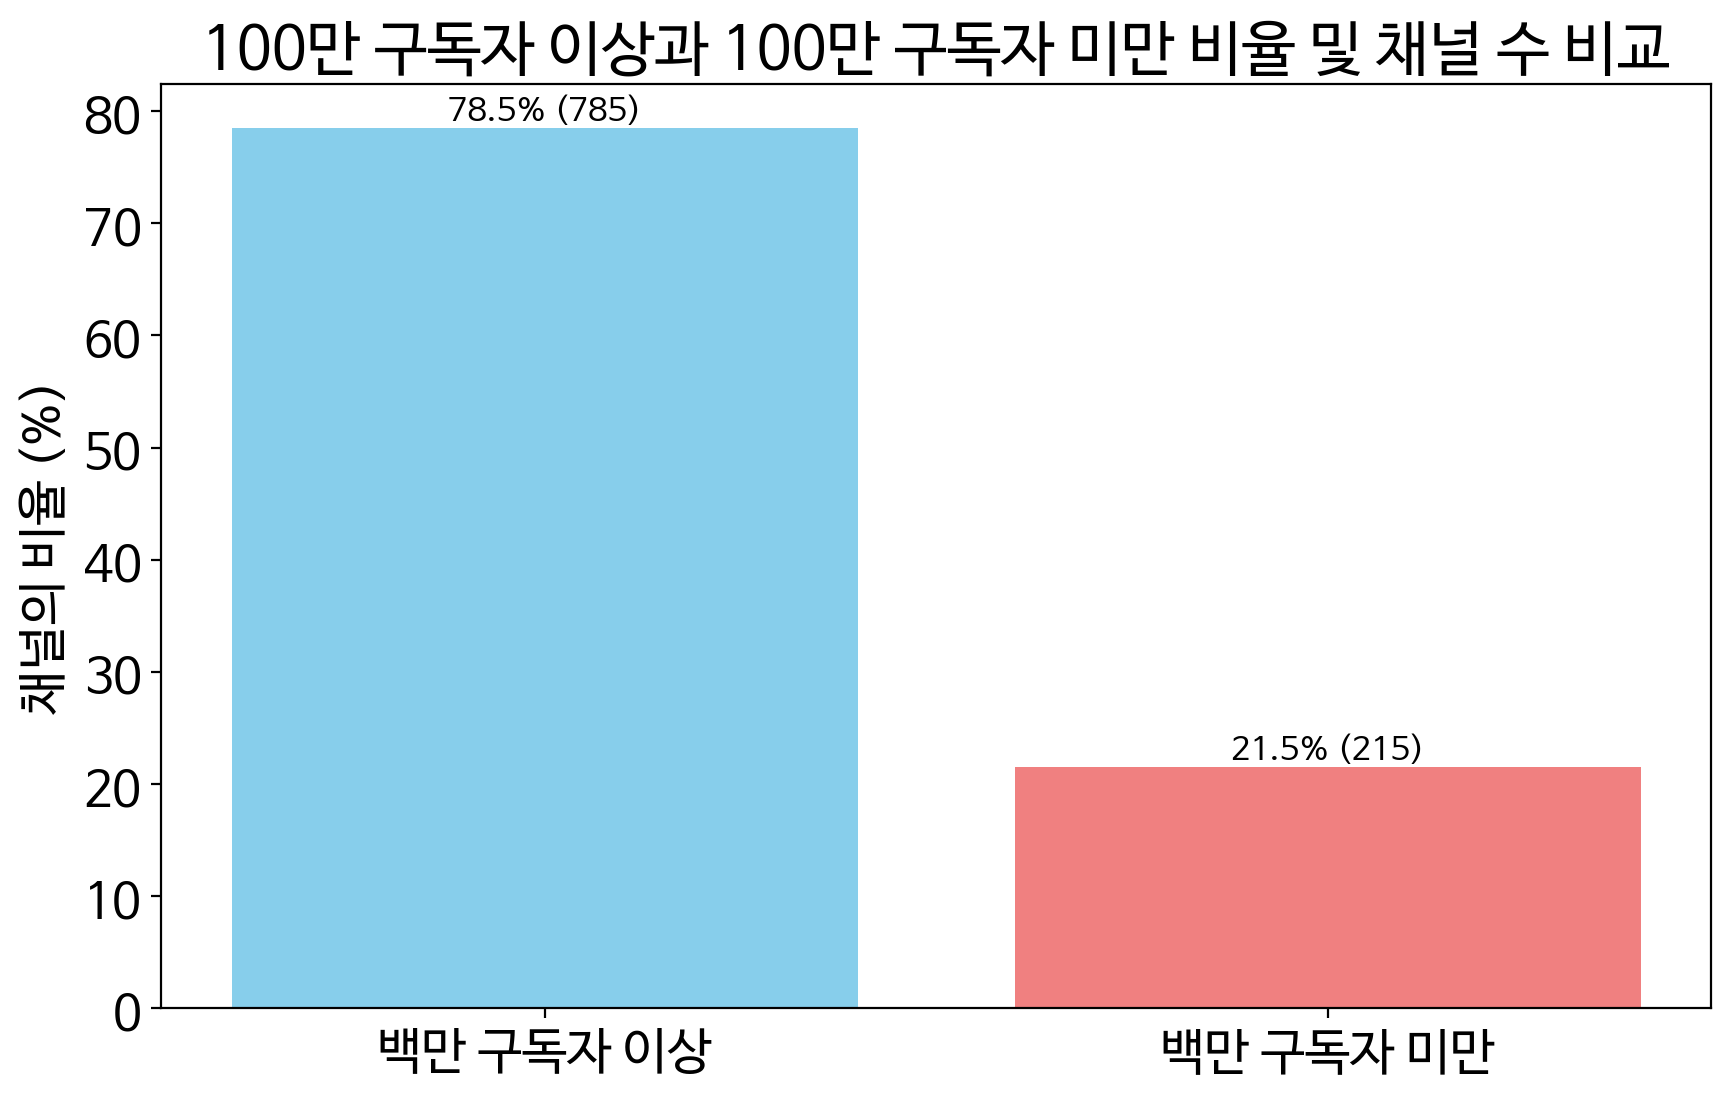

In [174]:
# 그래프로 비교
plt.figure(figsize=(10, 6))
bars = plt.bar(['100만 구독자 이상', '100만 구독자 미만'], [percentage_more_than_1m, percentage_less_than_1m], color=['skyblue', 'lightcoral'])

# 주석(비율) 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}% ({int(yval * total_channels / 100)})', ha='center', va='bottom', fontsize=12)

plt.ylabel('채널의 비율 (%)')
plt.title('100만 구독자 이상과 100만 구독자 미만 비율 및 채널 수 비교')
plt.show()


### **1-11. 100만 구독자 이상과 미만의 카테고리별 비율 계산 및 시각화**
#### 1. 100만 구독자 이상과 미만의 두 DataFrame을 생성
#### 2. groupby 홤수를 사용하여 각 DataFrame을 그룹화
#### 3. size() 함수로 각 그룹의 크기(채널 수)를 계산
#### 4. reset_index 함수를 사용하여 인덱스를 재설정 및 열 이름을 '백만 이상'과 '백만 미만'으로 재설정

In [175]:
# 100만 구독자 이상과 미만의 카테고리별 비율 계산
pivot_more_than_1m = more_than_1m_subscribers.groupby('category').size().reset_index(name='백만 이상')
pivot_less_than_1m = less_than_1m_subscribers.groupby('category').size().reset_index(name='백만 미만')

#### 5. merge 함수를 사용하여 두 DataFrame을 category를 기준으로 병합함
#### 6. fillna(0) 함수를 사용하여 NaN 값인 결측치를 0으로 채움

In [ ]:
# 두 데이터프레임을 합쳐서 비교할 수 있는 형태로 만듦
comparison_table = pd.merge(pivot_more_than_1m, pivot_less_than_1m, on='category', how='outer').fillna(0)

#### 7. '백만 이상'의 칼럼을 '백만 이상'과 '백만 미만' 합계의 비율로 계산하여 '비율' 열을 생성
#### 8. '비율' 열을 기준으로 내림차순 정렬

In [ ]:
# 비율 계산
comparison_table['비율'] = (comparison_table['백만 이상'] / (comparison_table['백만 이상'] + comparison_table['백만 미만'])) * 100

# 내림차순 정렬
comparison_table = comparison_table.sort_values(by='비율', ascending=False)

#### 9. 백만 이상인 채널과 미만인 채널을 막대 그래프 형태로 시각화
#### 10. bottom 매개변수를 이용하여 '백만 이상' 바 위에 '백만 미만'의 바를 쌓아 올려 표시

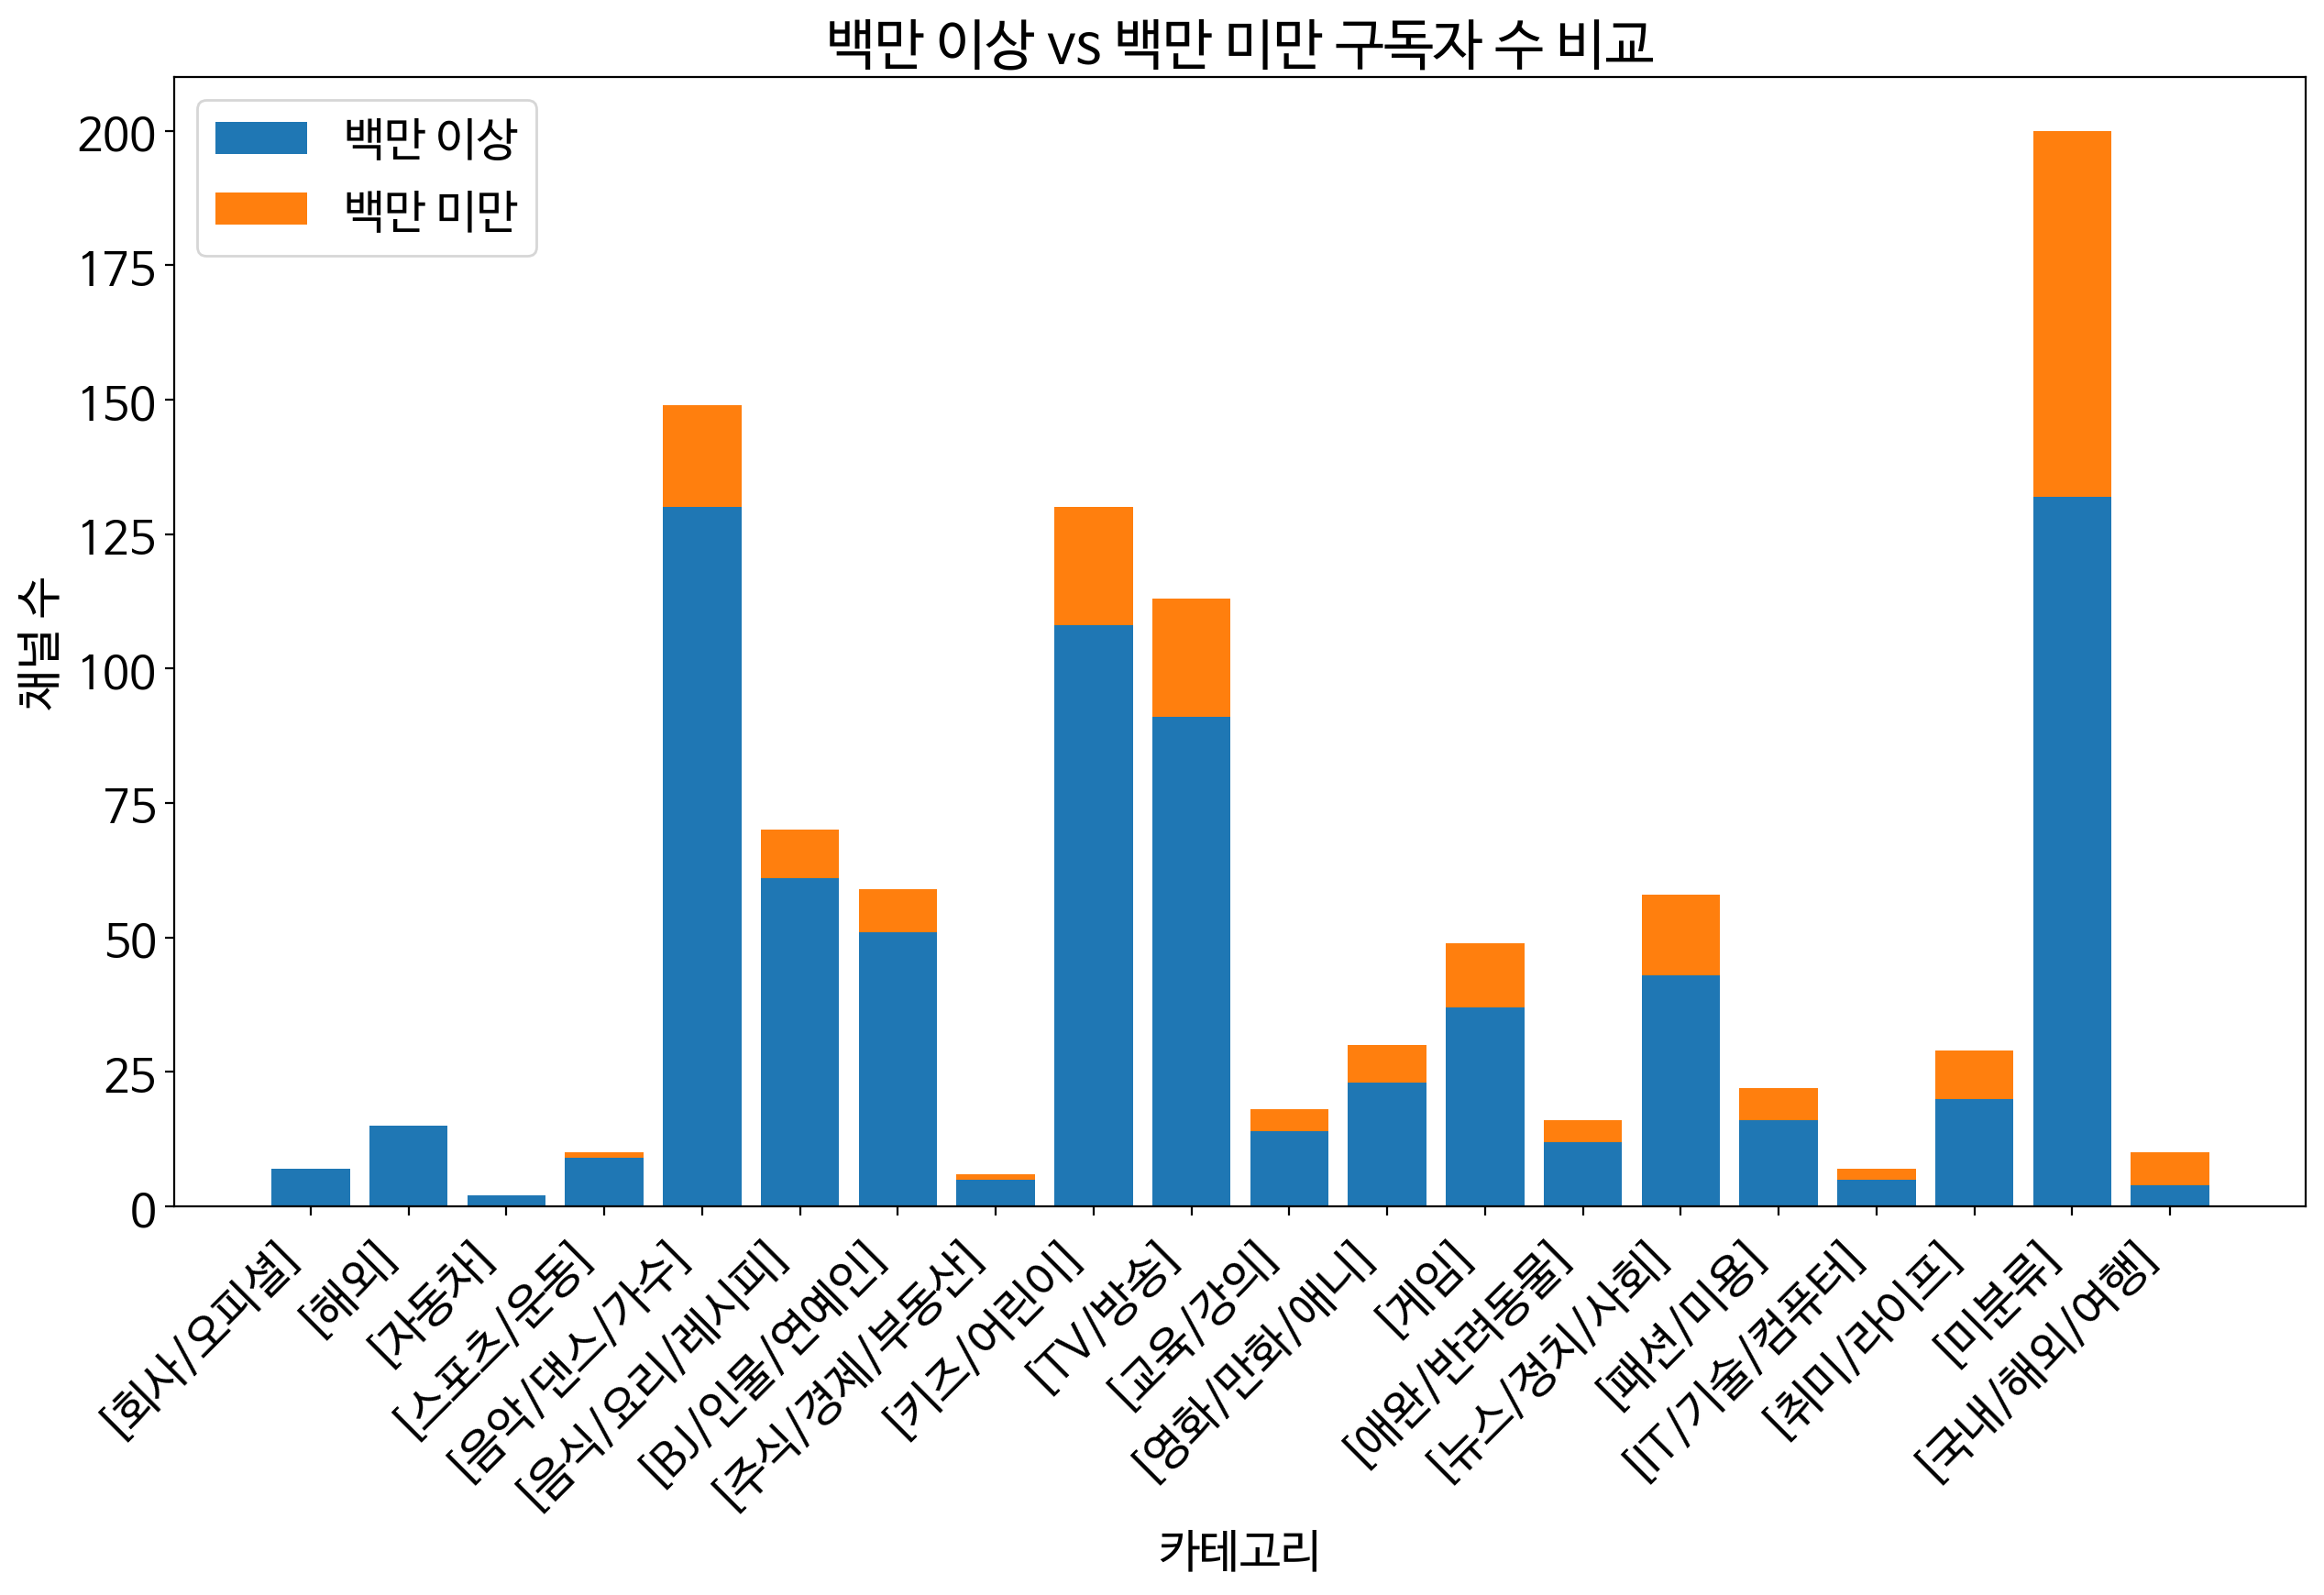

In [22]:
# 시각화
plt.figure(figsize=(15, 8))
plt.bar(comparison_table['category'], comparison_table['백만 이상'], label='백만 이상')
plt.bar(comparison_table['category'], comparison_table['백만 미만'], bottom=comparison_table['백만 이상'], label='백만 미만')

plt.xlabel('카테고리')
plt.ylabel('채널 수')
plt.title('백만 이상 vs 백만 미만 구독자 수 비교')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()
